In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))


2.18.0
[]


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print("Number of training samples: ", len(X_train))
print("Number of testing samples: ", len(X_test))
print("Shape of an image:", X_train[0].shape)

Number of training samples:  60000
Number of testing samples:  10000
Shape of an image: (28, 28)


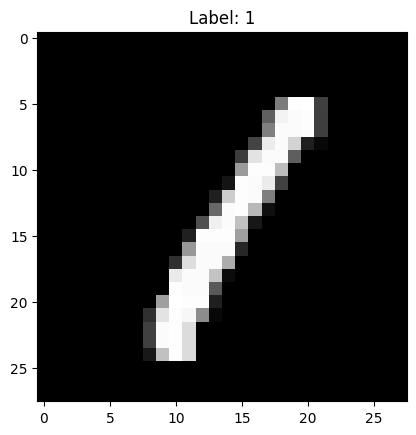

In [5]:
plt.imshow(X_train[3], cmap='gray')
plt.title(f"Label: {y_train[3]}")
plt.show()

In [6]:
# Normalize
# Always normalize pixel values when training neural networks on image data! 
X_train = X_train / 255
X_test = X_test / 255

In [65]:
model = Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation = "sigmoid"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

c:\Users\Kuugang\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8798 - loss: 0.4185 - val_accuracy: 0.9628 - val_loss: 0.1223
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9671 - loss: 0.1058 - val_accuracy: 0.9720 - val_loss: 0.0924
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9792 - loss: 0.0672 - val_accuracy: 0.9718 - val_loss: 0.0923
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9840 - loss: 0.0504 - val_accuracy: 0.9752 - val_loss: 0.0833
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9877 - loss: 0.0389 - val_accuracy: 0.9750 - val_loss: 0.0886


In [67]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9721 - loss: 0.1062


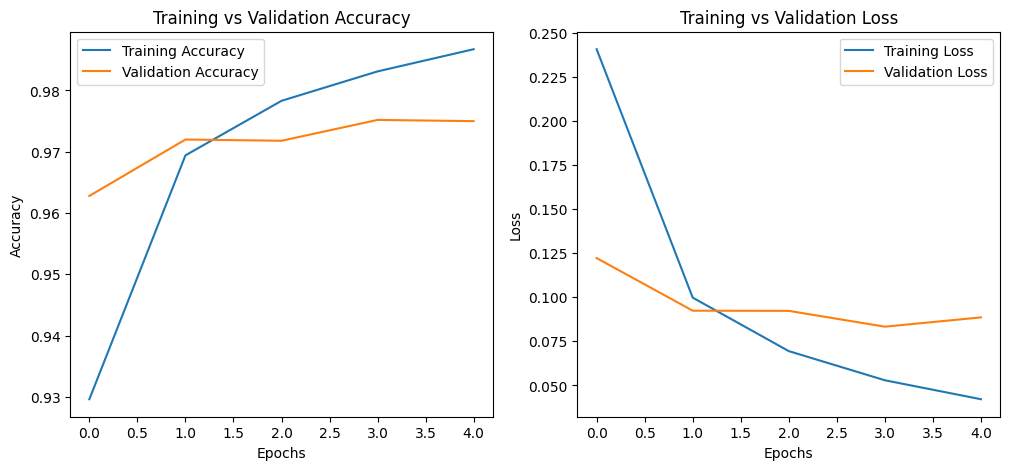

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

In [70]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


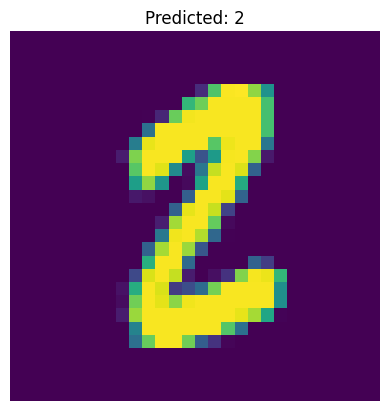

In [87]:
import random
index = random.randint(0, len(X_test) - 1)
plt.imshow(X_test[index])
plt.title(f"Predicted: {predicted_labels[index]}")
plt.axis("off")
plt.show()